In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [46]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [47]:
x_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [48]:
x_train,y_train = shuffle(x_train,y_train,random_state=101)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [50]:
print(x_train.shape,x_test.shape)

(2937, 150, 150, 3) (327, 150, 150, 3)


In [51]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [52]:
model = Sequential()

model.add(Conv2D(filters=(32),kernel_size=(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(filters=(64),kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=(64),kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=(64),kernel_size=(3,3),activation='relu'))
model.add(Dropout(rate=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=(128),kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=(128),kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=(128),kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=(128),kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=(256),kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))

model.add(Flatten())

model.add(Dense(units=512,activation = 'relu'))
model.add(Dense(units=512,activation = 'relu'))

model.add(Dropout(rate=0.3))
model.add(Dense(4,activation='softmax'))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_25 (Dropout)         (None, 69, 69, 64)       

In [54]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [55]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 4s 42ms/step - loss: 1.6572 - accuracy: 0.2807 - val_loss: 1.3610 - val_accuracy: 0.2891
Epoch 2/20
83/83 [==============================] - 3s 39ms/step - loss: 1.1709 - accuracy: 0.4718 - val_loss: 0.9187 - val_accuracy: 0.5816
Epoch 3/20
83/83 [==============================] - 3s 39ms/step - loss: 0.9242 - accuracy: 0.5974 - val_loss: 0.8238 - val_accuracy: 0.6224
Epoch 4/20
83/83 [==============================] - 3s 39ms/step - loss: 0.7990 - accuracy: 0.6633 - val_loss: 0.6568 - val_accuracy: 0.7347
Epoch 5/20
83/83 [==============================] - 3s 39ms/step - loss: 0.7101 - accuracy: 0.6950 - val_loss: 0.9307 - val_accuracy: 0.5782
Epoch 6/20
83/83 [==============================] - 3s 39ms/step - loss: 0.6621 - accuracy: 0.7200 - val_loss: 0.6147 - val_accuracy: 0.6939
Epoch 7/20
83/83 [==============================] - 3s 39ms/step - loss: 0.5753 - accuracy: 0.7601 - val_loss: 0.4995 - val_accuracy: 0.7993
Epoch 8/20
83

In [63]:
model.save('/kaggle/working/my_model.h5')

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

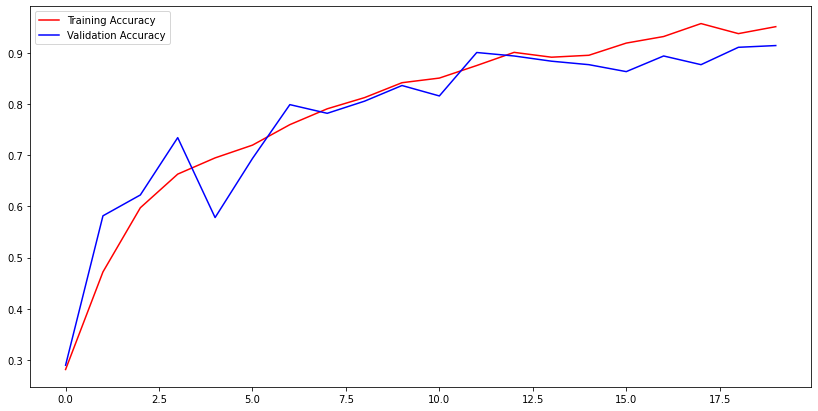

In [57]:
#model.save('my_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

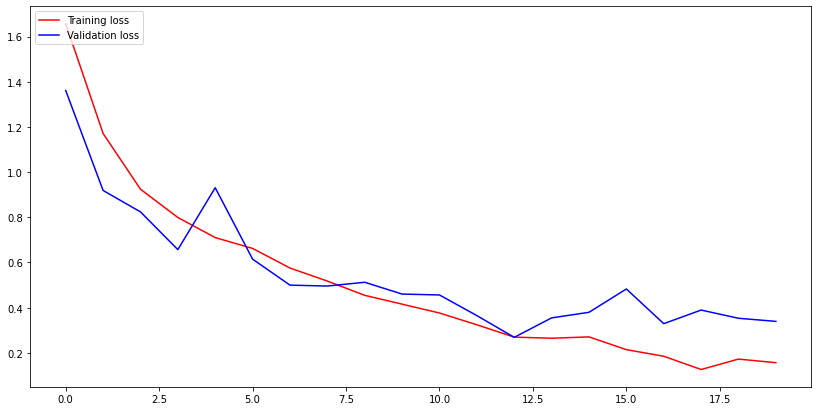

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [59]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [60]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

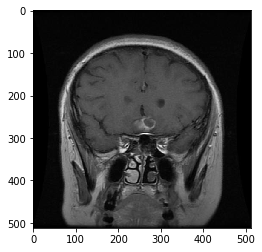

In [61]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [62]:
a=model.predict(img_array)
indices = a.argmax()
indices

3